In [ ]:
import pandas as pd
OTU= pd.read_csv("/content/drive/MyDrive/Datasets/OTU_Table_T_filtered.tsv",sep="\t")
OTU

,sample name,CAG-83 sp900545495,CAG-83 sp000435555,CAG-83 sp003539495,CAG-83 sp000431575,CAG-83 sp900547745,CAG-83 sp900548615,CAG-83 sp900552475,CAG-83 sp001916855,CAG-83 sp900554275,...,Methanobacterium sp000499765,MGYG000000610,MGYG000004361,UBA1436 sp900540405,Rs-D84 sp900546185,Acinetobacter sp900766635,Rs-D84 sp900550495,MGYG000004418,Rs-D84 sp900550565,Rs-D84 sp900549365
0,ERR14129551,29,34,16,15,20,67,25,21,81,...,0,0,0,0,0,0,0,0,0,0
1,ERR14129552,13,62,0,37,40,23,0,12,294,...,0,0,0,0,0,0,0,0,0,0
2,ERR14129553,333,552,437,485,334,501,457,456,325,...,0,0,0,0,0,0,0,0,0,0
3,ERR14129555,63631,8737,2615,4692,2659,3764,1607,219366,9304,...,0,0,0,0,0,0,0,0,0,0
4,ERR14129556,341,1399,834,44855,319,1159,224,293,1397,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2102,SRR8865590,9271,2760,1213,798,1003,1053,752,718,1595,...,0,0,0,40,0,0,0,0,0,0
2103,SRR8865592,438,1744,18562,1175,233,977,176,3968,1037,...,0,0,0,0,0,0,0,0,0,0
2104,SRR8865593,3032,73094,1743,2537,1847,5813,413,2151,6480,...,0,0,0,0,0,0,0,0,0,31
2105,SRR8865600,3917,9491,14572,773,2636,12732,950,1890,6400,...,0,0,0,992,0,0,0,0,0,0


In [ ]:
Metadata= pd.read_csv("/content/drive/MyDrive/Datasets/meadata_crc.tsv",sep="\t")
Metadata

,Run_ID,BioProject,BioSample,Health_status,Phenotype,Full_Name,Sex,Age,Location,Platform,BMI,CRC stage
0,SRR30861073,PRJNA1167935,SAMN44019356,Non-Healthy,CRC,Colorectal Cancer,FEMALE,75.0,Turkey,ILLUMINA,NaN,II
1,SRR30861074,PRJNA1167935,SAMN44019355,Non-Healthy,CRC,Colorectal Cancer,MALE,55.0,Turkey,ILLUMINA,NaN,IV
2,SRR30861075,PRJNA1167935,SAMN44019379,Healthy,Healthy,Healthy,MALE,64.0,Turkey,ILLUMINA,NaN,NaN
3,SRR30861076,PRJNA1167935,SAMN44019377,Healthy,Healthy,Healthy,FEMALE,46.0,Turkey,ILLUMINA,NaN,NaN
4,SRR30861077,PRJNA1167935,SAMN44019374,Healthy,Healthy,Healthy,MALE,52.0,Turkey,ILLUMINA,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
5139,ERR1018308,PRJEB10878,SAMEA3541592,Healthy,Healthy,Healthy,MALE,61.0,China,Illumina HiSeq 2000 platform,23.8,NaN
5140,ERR1018309,PRJEB10878,SAMEA3541593,Healthy,Healthy,Healthy,MALE,62.0,China,Illumina HiSeq 2000 platform,21.5,NaN
5141,ERR1018310,PRJEB10878,SAMEA3541594,Non-healthy,CRC,Colorectal Cancer,MALE,68.0,China,Illumina HiSeq 2000 platform,23.7,NaN
5142,ERR1018311,PRJEB10878,SAMEA3541595,Non-healthy,CRC,Colorectal Cancer,MALE,55.0,China,Illumina HiSeq 2000 platform,25.8,NaN


# Prevalance check

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Prepare species columns ---
species_cols = OTU.columns.drop('sample name')
num_samples = len(OTU)

# --- 2. Compute prevalence (%) for all species ---
presence = OTU[species_cols] > 0  # True if species is present
prevalence_pct = presence.sum(axis=0) / num_samples * 100

# Convert to DataFrame
prevalence_df = prevalence_pct.reset_index()
prevalence_df.columns = ['species', 'prevalence_pct']

# --- 3. Print the full prevalence table ---
print("Prevalence of all species (% of samples):")
print(prevalence_df.sort_values(by='prevalence_pct', ascending=False))



Prevalence of all species (% of samples):
                              species  prevalence_pct
888             Roseburia sp900552665      100.000000
912        Mediterraneibacter torques       99.952539
876   Fusicatenibacter saccharivorans       99.952539
243      Faecalibacterium prausnitzii       99.952539
973         Enterocloster sp900770345       99.952539
...                               ...             ...
4624               Rs-D84 sp900546185        1.281443
4620     Methanobacterium sp000499765        0.949217
4629               Rs-D84 sp900549365        0.854295
4591                    MGYG000003321        0.474608
4619                    MGYG000003602        0.284765

[4630 rows x 2 columns]


Number of species falling into each prevalence bin:
prevalence_bin
0.0        38
5.0        47
10.0       80
15.0      108
20.0      129
25.0      142
30.0      110
35.0      138
40.0      159
45.0      195
50.0      195
55.0      194
60.0      176
65.0      184
70.0      196
75.0      232
80.0      217
85.0      273
90.0      421
95.0     1395
100.0       1
Name: count, dtype: int64


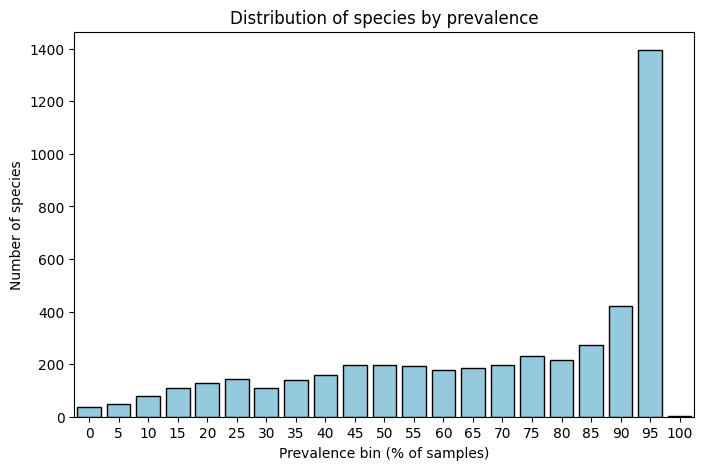

In [ ]:
# --- 4. Bin species by prevalence ---
# Round prevalence to nearest 5% (or 1% if you want finer bins)
prevalence_df['prevalence_bin'] = (prevalence_df['prevalence_pct'] // 5) * 5

# Count species per prevalence bin
bin_counts = prevalence_df['prevalence_bin'].value_counts().sort_index()

# --- 5. Print table ---
print("Number of species falling into each prevalence bin:")
print(bin_counts)

# --- 6. Bar plot (clean x-axis) ---
plt.figure(figsize=(8,5))
sns.barplot(x=bin_counts.index.astype(int), y=bin_counts.values,
            color="skyblue", edgecolor="black")
plt.xlabel("Prevalence bin (% of samples)")
plt.ylabel("Number of species")
plt.title("Distribution of species by prevalence")
plt.show()




In [ ]:
OTU_Table = OTU.copy()

OTU_Table

,sample name,CAG-83 sp900545495,CAG-83 sp000435555,CAG-83 sp003539495,CAG-83 sp000431575,CAG-83 sp900547745,CAG-83 sp900548615,CAG-83 sp900552475,CAG-83 sp001916855,CAG-83 sp900554275,...,Methanobacterium sp000499765,MGYG000000610,MGYG000004361,UBA1436 sp900540405,Rs-D84 sp900546185,Acinetobacter sp900766635,Rs-D84 sp900550495,MGYG000004418,Rs-D84 sp900550565,Rs-D84 sp900549365
0,ERR14129551,29,34,16,15,20,67,25,21,81,...,0,0,0,0,0,0,0,0,0,0
1,ERR14129552,13,62,0,37,40,23,0,12,294,...,0,0,0,0,0,0,0,0,0,0
2,ERR14129553,333,552,437,485,334,501,457,456,325,...,0,0,0,0,0,0,0,0,0,0
3,ERR14129555,63631,8737,2615,4692,2659,3764,1607,219366,9304,...,0,0,0,0,0,0,0,0,0,0
4,ERR14129556,341,1399,834,44855,319,1159,224,293,1397,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2102,SRR8865590,9271,2760,1213,798,1003,1053,752,718,1595,...,0,0,0,40,0,0,0,0,0,0
2103,SRR8865592,438,1744,18562,1175,233,977,176,3968,1037,...,0,0,0,0,0,0,0,0,0,0
2104,SRR8865593,3032,73094,1743,2537,1847,5813,413,2151,6480,...,0,0,0,0,0,0,0,0,0,31
2105,SRR8865600,3917,9491,14572,773,2636,12732,950,1890,6400,...,0,0,0,992,0,0,0,0,0,0


# CLR Transformation

In [ ]:
# If a species is more abundant than the geometric mean, CLR value is positive.

# If a species is less abundant than the geometric mean, CLR value is negative.

# If a species is exactly equal to the geometric mean, CLR value is 0.

In [ ]:
species_cols = OTU_Table.columns.drop('sample name')
import numpy as np
from scipy.stats import gmean

# CLR transformation (add pseudocount 1 to avoid log(0))
OTU_clr = OTU_Table[species_cols].apply(lambda row: np.log((row + 1) / gmean(row + 1)), axis=1)

# Add back the sample names
OTU_clr['sample name'] = OTU_Table['sample name']

# Optional: reorder columns to have sample name first
OTU_clr = OTU_clr[['sample name'] + [c for c in OTU_clr.columns if c != 'sample name']]
OTU_clr



,sample name,CAG-83 sp900545495,CAG-83 sp000435555,CAG-83 sp003539495,CAG-83 sp000431575,CAG-83 sp900547745,CAG-83 sp900548615,CAG-83 sp900552475,CAG-83 sp001916855,CAG-83 sp900554275,...,Methanobacterium sp000499765,MGYG000000610,MGYG000004361,UBA1436 sp900540405,Rs-D84 sp900546185,Acinetobacter sp900766635,Rs-D84 sp900550495,MGYG000004418,Rs-D84 sp900550565,Rs-D84 sp900549365
0,ERR14129551,1.480643,1.634793,0.912659,0.852034,1.123968,2.298953,1.337542,1.170488,2.486165,...,-1.920555,-1.920555,-1.920555,-1.920555,-1.920555,-1.920555,-1.920555,-1.920555,-1.920555,-1.920555
1,ERR14129552,0.647084,2.151162,-1.991973,1.645613,1.721599,1.186081,-1.991973,0.572977,3.695003,...,-1.991973,-1.991973,-1.991973,-1.991973,-1.991973,-1.991973,-1.991973,-1.991973,-1.991973,-1.991973
2,ERR14129553,2.614087,3.118304,2.885165,2.989154,2.617076,3.021546,2.929815,2.927629,2.589843,...,-3.197054,-3.197054,-3.197054,-3.197054,-3.197054,-3.197054,-3.197054,-3.197054,-3.197054,-3.197054
3,ERR14129555,7.740957,5.755522,4.549487,5.133913,4.566167,4.913589,4.062832,8.978587,5.818393,...,-3.319914,-3.319914,-3.319914,-3.319914,-3.319914,-3.319914,-3.319914,-3.319914,-3.319914,-3.319914
4,ERR14129556,2.619714,4.029131,3.512335,7.496116,2.553225,3.841079,2.201004,2.468483,4.027702,...,-3.215096,-3.215096,-3.215096,-3.215096,-3.215096,-3.215096,-3.215096,-3.215096,-3.215096,-3.215096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2102,SRR8865590,6.810131,5.598725,4.777053,4.358738,4.587124,4.635725,4.299442,4.253238,5.050633,...,-2.324623,-2.324623,-2.324623,1.388949,-2.324623,-2.324623,-2.324623,-2.324623,-2.324623,-2.324623
2103,SRR8865592,4.407013,5.787023,8.151439,5.392388,3.777835,5.208023,3.498663,6.608783,5.267565,...,-1.677486,-1.677486,-1.677486,-1.677486,-1.677486,-1.677486,-1.677486,-1.677486,-1.677486,-1.677486
2104,SRR8865593,4.801511,7.983718,4.248140,4.623335,4.306062,5.452227,2.810069,4.458356,5.560833,...,-3.215797,-3.215797,-3.215797,-3.215797,-3.215797,-3.215797,-3.215797,-3.215797,-3.215797,0.249939
2105,SRR8865600,5.513561,6.398429,6.827150,3.891796,5.117622,6.692177,4.097739,4.785086,6.004434,...,-2.759775,-2.759775,-2.759775,4.140955,-2.759775,-2.759775,-2.759775,-2.759775,-2.759775,-2.759775


In [ ]:
Metadata

,Run_ID,BioProject,BioSample,Health_status,Phenotype,Full_Name,Sex,Age,Location,Platform,BMI,CRC stage
0,SRR30861073,PRJNA1167935,SAMN44019356,Non-Healthy,CRC,Colorectal Cancer,FEMALE,75.0,Turkey,ILLUMINA,NaN,II
1,SRR30861074,PRJNA1167935,SAMN44019355,Non-Healthy,CRC,Colorectal Cancer,MALE,55.0,Turkey,ILLUMINA,NaN,IV
2,SRR30861075,PRJNA1167935,SAMN44019379,Healthy,Healthy,Healthy,MALE,64.0,Turkey,ILLUMINA,NaN,NaN
3,SRR30861076,PRJNA1167935,SAMN44019377,Healthy,Healthy,Healthy,FEMALE,46.0,Turkey,ILLUMINA,NaN,NaN
4,SRR30861077,PRJNA1167935,SAMN44019374,Healthy,Healthy,Healthy,MALE,52.0,Turkey,ILLUMINA,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
5139,ERR1018308,PRJEB10878,SAMEA3541592,Healthy,Healthy,Healthy,MALE,61.0,China,Illumina HiSeq 2000 platform,23.8,NaN
5140,ERR1018309,PRJEB10878,SAMEA3541593,Healthy,Healthy,Healthy,MALE,62.0,China,Illumina HiSeq 2000 platform,21.5,NaN
5141,ERR1018310,PRJEB10878,SAMEA3541594,Non-healthy,CRC,Colorectal Cancer,MALE,68.0,China,Illumina HiSeq 2000 platform,23.7,NaN
5142,ERR1018311,PRJEB10878,SAMEA3541595,Non-healthy,CRC,Colorectal Cancer,MALE,55.0,China,Illumina HiSeq 2000 platform,25.8,NaN


In [ ]:
# Adding class label (if healthy then 1, non-healthy 0)--> Health binary

# Create a new column 'Health_binary'
Metadata['Health_binary'] = Metadata['Health_status'].str.lower().map(lambda x: 1 if x == 'healthy' else 0)

# Check the result
Metadata[['Health_status', 'Health_binary']].head(10)
Metadata


,Run_ID,BioProject,BioSample,Health_status,Phenotype,Full_Name,Sex,Age,Location,Platform,BMI,CRC stage,Health_binary
0,SRR30861073,PRJNA1167935,SAMN44019356,Non-Healthy,CRC,Colorectal Cancer,FEMALE,75.0,Turkey,ILLUMINA,NaN,II,0
1,SRR30861074,PRJNA1167935,SAMN44019355,Non-Healthy,CRC,Colorectal Cancer,MALE,55.0,Turkey,ILLUMINA,NaN,IV,0
2,SRR30861075,PRJNA1167935,SAMN44019379,Healthy,Healthy,Healthy,MALE,64.0,Turkey,ILLUMINA,NaN,NaN,1
3,SRR30861076,PRJNA1167935,SAMN44019377,Healthy,Healthy,Healthy,FEMALE,46.0,Turkey,ILLUMINA,NaN,NaN,1
4,SRR30861077,PRJNA1167935,SAMN44019374,Healthy,Healthy,Healthy,MALE,52.0,Turkey,ILLUMINA,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5139,ERR1018308,PRJEB10878,SAMEA3541592,Healthy,Healthy,Healthy,MALE,61.0,China,Illumina HiSeq 2000 platform,23.8,NaN,1
5140,ERR1018309,PRJEB10878,SAMEA3541593,Healthy,Healthy,Healthy,MALE,62.0,China,Illumina HiSeq 2000 platform,21.5,NaN,1
5141,ERR1018310,PRJEB10878,SAMEA3541594,Non-healthy,CRC,Colorectal Cancer,MALE,68.0,China,Illumina HiSeq 2000 platform,23.7,NaN,0
5142,ERR1018311,PRJEB10878,SAMEA3541595,Non-healthy,CRC,Colorectal Cancer,MALE,55.0,China,Illumina HiSeq 2000 platform,25.8,NaN,0


Merging this Dataframe with the OTU_clr

In [ ]:
merge_df=pd.merge(OTU_clr, Metadata, left_on = "sample name", right_on="Run_ID")
merge_df

,sample name,CAG-83 sp900545495,CAG-83 sp000435555,CAG-83 sp003539495,CAG-83 sp000431575,CAG-83 sp900547745,CAG-83 sp900548615,CAG-83 sp900552475,CAG-83 sp001916855,CAG-83 sp900554275,...,Health_status,Phenotype,Full_Name,Sex,Age,Location,Platform,BMI,CRC stage,Health_binary
0,ERR14129551,1.480643,1.634793,0.912659,0.852034,1.123968,2.298953,1.337542,1.170488,2.486165,...,Non-Healthy,CRC,Colorectal Cancer,MALE,42.0,Italy,ILLUMINA,25.5,IV,0
1,ERR14129551,1.480643,1.634793,0.912659,0.852034,1.123968,2.298953,1.337542,1.170488,2.486165,...,Non-Healthy,CRC,Colorectal Cancer,MALE,42.0,Italy,ILLUMINA,25.5,IV,0
2,ERR14129552,0.647084,2.151162,-1.991973,1.645613,1.721599,1.186081,-1.991973,0.572977,3.695003,...,Non-Healthy,CRC,Colorectal Cancer,MALE,68.0,Italy,ILLUMINA,19.2,IV,0
3,ERR14129552,0.647084,2.151162,-1.991973,1.645613,1.721599,1.186081,-1.991973,0.572977,3.695003,...,Non-Healthy,CRC,Colorectal Cancer,MALE,68.0,Italy,ILLUMINA,19.2,IV,0
4,ERR14129553,2.614087,3.118304,2.885165,2.989154,2.617076,3.021546,2.929815,2.927629,2.589843,...,Non-Healthy,CRC,Colorectal Cancer,MALE,55.0,Italy,ILLUMINA,22.4,IV,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2245,SRR8865590,6.810131,5.598725,4.777053,4.358738,4.587124,4.635725,4.299442,4.253238,5.050633,...,Non-Healthy,CRC,Colorectal Cancer,FEMALE,53.0,India,ILLUMINA,23.0,III,0
2246,SRR8865592,4.407013,5.787023,8.151439,5.392388,3.777835,5.208023,3.498663,6.608783,5.267565,...,Non-Healthy,CRC,Colorectal Cancer,MALE,49.0,India,ILLUMINA,20.8,III,0
2247,SRR8865593,4.801511,7.983718,4.248140,4.623335,4.306062,5.452227,2.810069,4.458356,5.560833,...,Non-Healthy,CRC,Colorectal Cancer,MALE,72.0,India,ILLUMINA,18.2,III,0
2248,SRR8865600,5.513561,6.398429,6.827150,3.891796,5.117622,6.692177,4.097739,4.785086,6.004434,...,Non-Healthy,CRC,Colorectal Cancer,FEMALE,41.0,India,ILLUMINA,19.2,I,0


In [ ]:
Model_Data = merge_df.drop(columns=['sample name','Run_ID','BioProject','BioSample','Health_status','Phenotype',
                               'Full_Name','Sex','Age','Location','Platform','BMI','CRC stage'])
Model_Data

,CAG-83 sp900545495,CAG-83 sp000435555,CAG-83 sp003539495,CAG-83 sp000431575,CAG-83 sp900547745,CAG-83 sp900548615,CAG-83 sp900552475,CAG-83 sp001916855,CAG-83 sp900554275,CAG-83 sp900545585,...,MGYG000000610,MGYG000004361,UBA1436 sp900540405,Rs-D84 sp900546185,Acinetobacter sp900766635,Rs-D84 sp900550495,MGYG000004418,Rs-D84 sp900550565,Rs-D84 sp900549365,Health_binary
0,1.480643,1.634793,0.912659,0.852034,1.123968,2.298953,1.337542,1.170488,2.486165,1.023884,...,-1.920555,-1.920555,-1.920555,-1.920555,-1.920555,-1.920555,-1.920555,-1.920555,-1.920555,0
1,1.480643,1.634793,0.912659,0.852034,1.123968,2.298953,1.337542,1.170488,2.486165,1.023884,...,-1.920555,-1.920555,-1.920555,-1.920555,-1.920555,-1.920555,-1.920555,-1.920555,-1.920555,0
2,0.647084,2.151162,-1.991973,1.645613,1.721599,1.186081,-1.991973,0.572977,3.695003,1.226903,...,-1.991973,-1.991973,-1.991973,-1.991973,-1.991973,-1.991973,-1.991973,-1.991973,-1.991973,0
3,0.647084,2.151162,-1.991973,1.645613,1.721599,1.186081,-1.991973,0.572977,3.695003,1.226903,...,-1.991973,-1.991973,-1.991973,-1.991973,-1.991973,-1.991973,-1.991973,-1.991973,-1.991973,0
4,2.614087,3.118304,2.885165,2.989154,2.617076,3.021546,2.929815,2.927629,2.589843,2.561848,...,-3.197054,-3.197054,-3.197054,-3.197054,-3.197054,-3.197054,-3.197054,-3.197054,-3.197054,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2245,6.810131,5.598725,4.777053,4.358738,4.587124,4.635725,4.299442,4.253238,5.050633,4.657312,...,-2.324623,-2.324623,1.388949,-2.324623,-2.324623,-2.324623,-2.324623,-2.324623,-2.324623,0
2246,4.407013,5.787023,8.151439,5.392388,3.777835,5.208023,3.498663,6.608783,5.267565,3.352951,...,-1.677486,-1.677486,-1.677486,-1.677486,-1.677486,-1.677486,-1.677486,-1.677486,-1.677486,0
2247,4.801511,7.983718,4.248140,4.623335,4.306062,5.452227,2.810069,4.458356,5.560833,6.374075,...,-3.215797,-3.215797,-3.215797,-3.215797,-3.215797,-3.215797,-3.215797,-3.215797,0.249939,0
2248,5.513561,6.398429,6.827150,3.891796,5.117622,6.692177,4.097739,4.785086,6.004434,5.704650,...,-2.759775,-2.759775,4.140955,-2.759775,-2.759775,-2.759775,-2.759775,-2.759775,-2.759775,0


# **Machine Learning Classifiers**

Preparing features and target

In [ ]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = Model_Data.drop(columns=['Health_binary'])
y = Model_Data['Health_binary']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

1800
450
1800
450


## **Model1-->Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# --- Train Random Forest ---
rf = RandomForestClassifier(n_estimators=500, random_state=42)
rf.fit(X_train, y_train)

# --- Predict ---
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:,1]  # probability for class 1

# --- Print performance metrics ---
print("=== Random Forest Performance ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

=== Random Forest Performance ===
Accuracy: 0.72
ROC-AUC: 0.7929625808081873

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.91      0.80       281
           1       0.73      0.40      0.52       169

    accuracy                           0.72       450
   macro avg       0.72      0.66      0.66       450
weighted avg       0.72      0.72      0.70       450



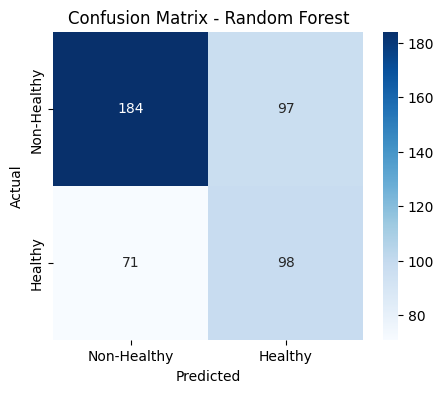

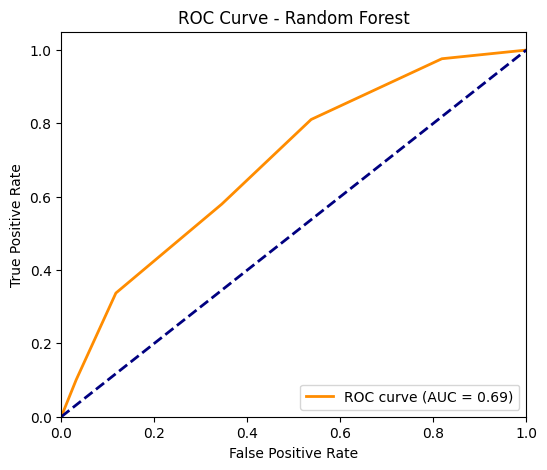

In [ ]:
# --- Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Non-Healthy", "Healthy"],
            yticklabels=["Non-Healthy", "Healthy"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Random Forest')
plt.show()

# --- ROC Curve ---
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc="lower right")
plt.show()

## Hyper parameter tuning

In [ ]:

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, roc_auc_score

# Parameter grid
param_grid = {
    'n_estimators': [50, 100, 150, 200 ],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

# Initialize Random Forest
rf = RandomForestClassifier(random_state=42)

# Use ROC-AUC as scoring
roc_scorer = make_scorer(roc_auc_score, needs_proba=True)

# Randomized Search
rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=25,  # number of random combinations to try
    scoring=roc_scorer,
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit
rf_random.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", rf_random.best_params_)
print("Best ROC-AUC (CV):", rf_random.best_score_)


Fitting 3 folds for each of 25 candidates, totalling 75 fits


KeyboardInterrupt: 

In [ ]:
"""
best_rf = rf_random.best_estimator_

y_pred = best_rf.predict(X_test)
y_proba = best_rf.predict_proba(X_test)[:,1]

# Accuracy and ROC-AUC
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Test ROC-AUC:", roc_auc_score(y_test, y_proba))
print(classification_report(y_test, y_pred))
"""

'\nbest_rf = rf_random.best_estimator_\n\ny_pred = best_rf.predict(X_test)\ny_proba = best_rf.predict_proba(X_test)[:,1]\n\n# Accuracy and ROC-AUC\nfrom sklearn.metrics import accuracy_score, roc_auc_score, classification_report\nprint("Test Accuracy:", accuracy_score(y_test, y_pred))\nprint("Test ROC-AUC:", roc_auc_score(y_test, y_proba))\nprint(classification_report(y_test, y_pred))\n'

## **Model2-->XGBoost Classifier**

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [09:38:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Classifier Performance
Accuracy: 0.7333
ROC AUC: 0.8042

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.84      0.80       281
           1       0.67      0.56      0.61       169

    accuracy                           0.73       450
   macro avg       0.72      0.70      0.70       450
weighted avg       0.73      0.73      0.73       450



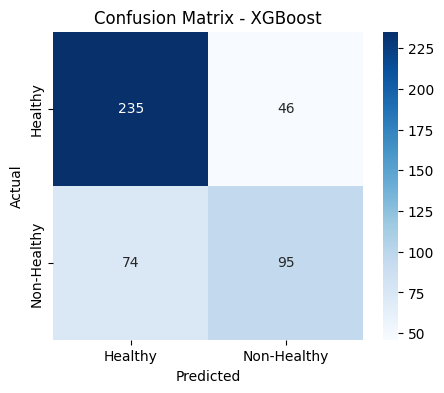

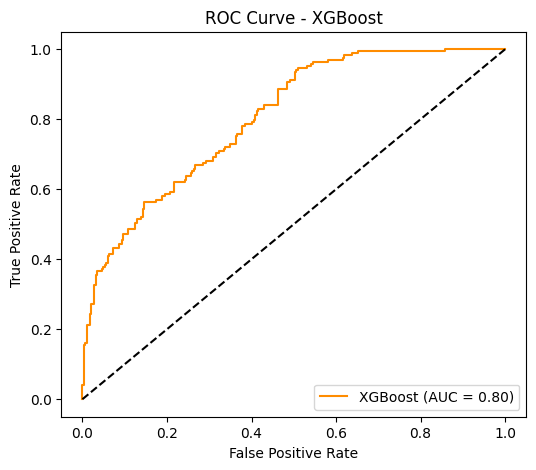

In [ ]:
import xgboost as xgb
from sklearn.metrics import (
    accuracy_score, roc_auc_score, confusion_matrix, classification_report, roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

# --- Train the XGBoost model ---
xgb_clf = xgb.XGBClassifier(
    n_estimators=200,      # number of trees
    learning_rate=0.1,     # step size shrinkage
    max_depth=6,           # max depth of trees
    subsample=0.8,         # random samples per tree
    colsample_bytree=0.8,  # features per tree
    random_state=42,
    use_label_encoder=False,
    eval_metric="logloss"
)

xgb_clf.fit(X_train, y_train)

# --- Predictions ---
y_pred = xgb_clf.predict(X_test)
y_proba = xgb_clf.predict_proba(X_test)[:, 1]

# --- Performance metrics ---
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
cm = confusion_matrix(y_test, y_pred)

print("XGBoost Classifier Performance")
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# --- Confusion Matrix ---
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Healthy", "Non-Healthy"],
            yticklabels=["Healthy", "Non-Healthy"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost")
plt.show()

# --- ROC Curve ---
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"XGBoost (AUC = {roc_auc:.2f})", color="darkorange")
plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost")
plt.legend(loc="lower right")
plt.show()


In [ ]:
import xgboost as xgb
from sklearn.metrics import (
    accuracy_score, roc_auc_score, confusion_matrix, classification_report, roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

# --- Train the XGBoost model ---
xgb_clf = xgb.XGBClassifier(
    n_estimators=500,      # number of trees
    learning_rate=0.1,     # step size shrinkage
    max_depth=6,           # max depth of trees
    subsample=0.8,         # random samples per tree
    colsample_bytree=0.8,  # features per tree
    random_state=42,
    use_label_encoder=False,
    eval_metric="logloss"
)

xgb_clf.fit(X_train, y_train)

# --- Predictions ---
y_pred = xgb_clf.predict(X_test)
y_proba = xgb_clf.predict_proba(X_test)[:, 1]

# --- Performance metrics ---
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
cm = confusion_matrix(y_test, y_pred)

print("XGBoost Classifier Performance")
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [09:41:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Classifier Performance
Accuracy: 0.7311
ROC AUC: 0.8034

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.83      0.79       281
           1       0.66      0.57      0.62       169

    accuracy                           0.73       450
   macro avg       0.71      0.70      0.70       450
weighted avg       0.73      0.73      0.73       450



In [ ]:
import xgboost as xgb
from sklearn.metrics import (
    accuracy_score, roc_auc_score, confusion_matrix, classification_report, roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

# --- Train the XGBoost model ---
xgb_clf = xgb.XGBClassifier(
    n_estimators=800,      # number of trees
    learning_rate=0.1,     # step size shrinkage
    max_depth=6,           # max depth of trees
    subsample=0.8,         # random samples per tree
    colsample_bytree=0.8,  # features per tree
    random_state=42,
    use_label_encoder=False,
    eval_metric="logloss"
)

xgb_clf.fit(X_train, y_train)

# --- Predictions ---
y_pred = xgb_clf.predict(X_test)
y_proba = xgb_clf.predict_proba(X_test)[:, 1]

# --- Performance metrics ---
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
cm = confusion_matrix(y_test, y_pred)

print("XGBoost Classifier Performance")
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [09:46:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Classifier Performance
Accuracy: 0.7333
ROC AUC: 0.8040

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.82      0.79       281
           1       0.66      0.59      0.62       169

    accuracy                           0.73       450
   macro avg       0.72      0.70      0.71       450
weighted avg       0.73      0.73      0.73       450



# Hyper Parameter Tuning

In [ ]:
"""
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix, RocCurveDisplay
import matplotlib.pyplot as plt

# --- Define the model ---
xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

# --- Define hyperparameter grid ---
param_grid = {
    'n_estimators': [50 , 100, 150 , 200],   # number of trees
    'max_depth': [3, 5, 7],                 # tree depth
    'learning_rate': [0.01, 0.05, 0.1],     # step size
    'subsample': [0.8, 1.0],                # fraction of samples per tree
    'colsample_bytree': [0.8, 1.0]          # fraction of features per tree
}

# --- GridSearch with 3-fold cross-validation ---
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='roc_auc',   # optimizing for ROC AUC
    cv=3,
    verbose=2,
    n_jobs=-1
)

# --- Fit the model ---
grid_search.fit(X_train, y_train)

# --- Best parameters ---
print("Best Parameters:", grid_search.best_params_)
print("Best CV Score (ROC AUC):", grid_search.best_score_)

# --- Evaluate on test set ---
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:,1]

print("\nTest Accuracy:", accuracy_score(y_test, y_pred))
print("Test ROC AUC:", roc_auc_score(y_test, y_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# --- Plot ROC Curve ---
RocCurveDisplay.from_estimator(best_model, X_test, y_test)
plt.title("XGBoost ROC Curve (Tuned)")
plt.show()
"""

'\nfrom xgboost import XGBClassifier\nfrom sklearn.model_selection import GridSearchCV\nfrom sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix, RocCurveDisplay\nimport matplotlib.pyplot as plt\n\n# --- Define the model ---\nxgb = XGBClassifier(\n    objective=\'binary:logistic\',\n    eval_metric=\'logloss\',\n    use_label_encoder=False,\n    random_state=42\n)\n\n# --- Define hyperparameter grid ---\nparam_grid = {\n    \'n_estimators\': [50 , 100, 150 , 200],   # number of trees\n    \'max_depth\': [3, 5, 7],                 # tree depth\n    \'learning_rate\': [0.01, 0.05, 0.1],     # step size\n    \'subsample\': [0.8, 1.0],                # fraction of samples per tree\n    \'colsample_bytree\': [0.8, 1.0]          # fraction of features per tree\n}\n\n# --- GridSearch with 3-fold cross-validation ---\ngrid_search = GridSearchCV(\n    estimator=xgb,\n    param_grid=param_grid,\n    scoring=\'roc_auc\',   # optimizing for ROC AUC\n    cv

## **Model3-->SVM**

Test Accuracy: 0.7
Test ROC AUC: 0.7788540504116743

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.86      0.78       281
           1       0.65      0.43      0.52       169

    accuracy                           0.70       450
   macro avg       0.68      0.65      0.65       450
weighted avg       0.69      0.70      0.68       450



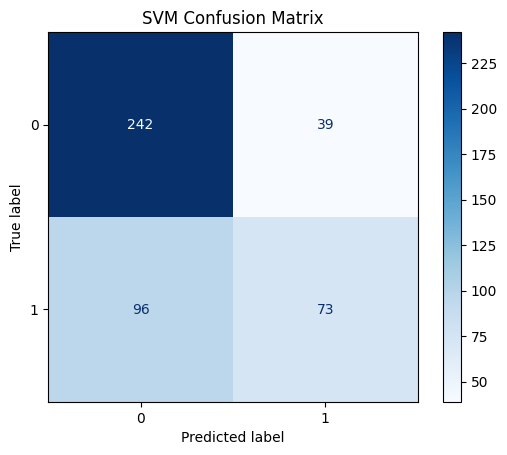

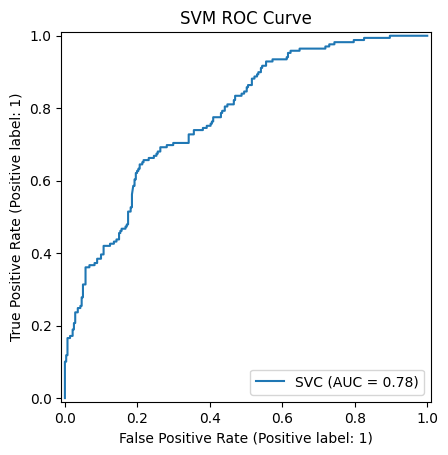

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
import matplotlib.pyplot as plt

# --- Define the model ---
svm_model = SVC(
    kernel='rbf',          # Radial Basis Function kernel (common choice)
    probability=True,      # Needed for ROC curve
    random_state=42
)

# --- Fit the model ---
svm_model.fit(X_train, y_train)

# --- Predictions ---
y_pred = svm_model.predict(X_test)
y_proba = svm_model.predict_proba(X_test)[:,1]

# --- Performance metrics ---
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Test ROC AUC:", roc_auc_score(y_test, y_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# --- Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("SVM Confusion Matrix")
plt.show()

# --- ROC Curve ---
RocCurveDisplay.from_estimator(svm_model, X_test, y_test)
plt.title("SVM ROC Curve")
plt.show()


In [ ]:
# --------------
# With scaling
# --------------

SVM Accuracy: 0.7266666666666667
Confusion Matrix:
 [[239  42]
 [ 81  88]]


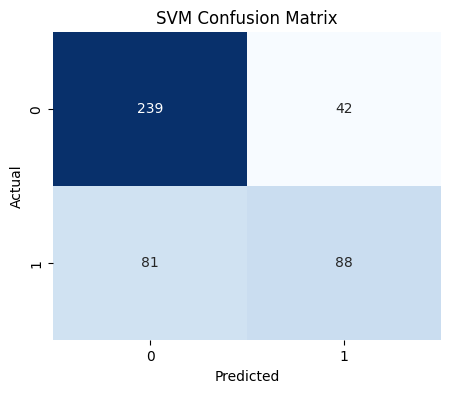

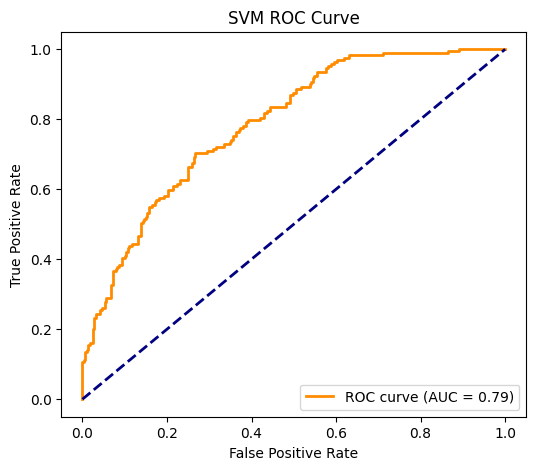

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc

# ---- SVM Pipeline with Scaling ----
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),   # Standardize features
    ('svm', SVC(kernel='rbf', probability=True, random_state=42))
])

# Train
svm_pipeline.fit(X_train, y_train)

# Predictions
y_pred = svm_pipeline.predict(X_test)
y_prob = svm_pipeline.predict_proba(X_test)[:, 1]

# ---- Performance Metrics ----
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("SVM Accuracy:", acc)
print("Confusion Matrix:\n", cm)

# ---- Confusion Matrix Plot ----
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("SVM Confusion Matrix")
plt.show()

# ---- ROC Curve ----
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("SVM ROC Curve")
plt.legend(loc="lower right")
plt.show()


## **Model4-->LightGBM classification**

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 677, number of negative: 1123
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.272284 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1180650
[LightGBM] [Info] Number of data points in the train set: 1800, number of used features: 4630
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376111 -> initscore=-0.506088
[LightGBM] [Info] Start training from score -0.506088
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

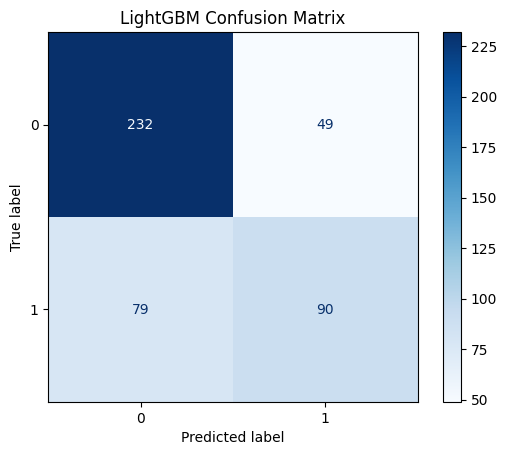

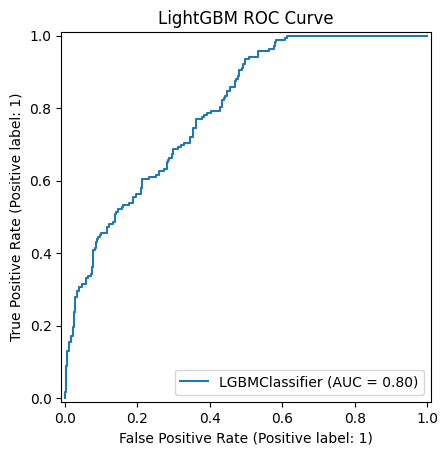

In [ ]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

# --- 1. Define the model ---
lgb_model = lgb.LGBMClassifier(
    n_estimators=500,      # Number of boosting iterations
    learning_rate=0.05,    # Step size shrinkage
    max_depth=7,           # Maximum tree depth
    random_state=42
)

# --- 2. Fit the model ---
lgb_model.fit(X_train, y_train)

# --- 3. Predictions ---
y_pred = lgb_model.predict(X_test)
y_proba = lgb_model.predict_proba(X_test)[:, 1]

# --- 4. Performance metrics ---
print("LightGBM Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# --- 5. Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("LightGBM Confusion Matrix")
plt.show()

# --- 6. ROC Curve ---
RocCurveDisplay.from_estimator(lgb_model, X_test, y_test)
plt.title("LightGBM ROC Curve")
plt.show()


In [ ]:
"""
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, roc_auc_score

# --- 1. Define base model ---
lgb_model = lgb.LGBMClassifier(random_state=42)

# --- 2. Set hyperparameter grid ---
param_grid = {
    'n_estimators': [50, 100, 200, 500],   # Number of boosting iterations
    'learning_rate': [0.01, 0.05, 0.1],    # Step size shrinkage
    'max_depth': [5, 7, 10],                # Maximum tree depth
    'num_leaves': [31, 50, 70],             # Number of leaves per tree
    'min_child_samples': [5, 10, 20],       # Min samples in a leaf
    'subsample': [0.7, 0.8, 1.0],           # Row sampling
    'colsample_bytree': [0.7, 0.8, 1.0]     # Column sampling
}

# --- 3. Define scoring metric ---
roc_auc = make_scorer(roc_auc_score, needs_proba=True)

# --- 4. Initialize GridSearch ---
grid_search = GridSearchCV(
    estimator=lgb_model,
    param_grid=param_grid,
    scoring=roc_auc,
    cv=5,
    n_jobs=-1,
    verbose=2
)

# --- 5. Fit GridSearch ---
grid_search.fit(X_train, y_train)

# --- 6. Best parameters and score ---
print("Best Parameters:", grid_search.best_params_)
print("Best ROC AUC:", grid_search.best_score_)
"""

## **Model5-->Logistic Regression with Regularization**

Logistic Regression Performance:
Accuracy: 0.6688888888888889
ROC AUC: 0.747141443281602


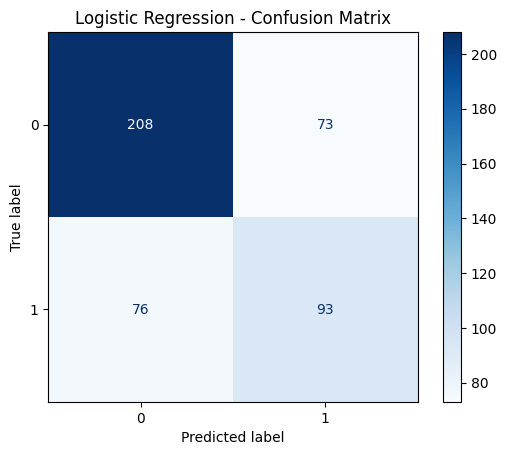

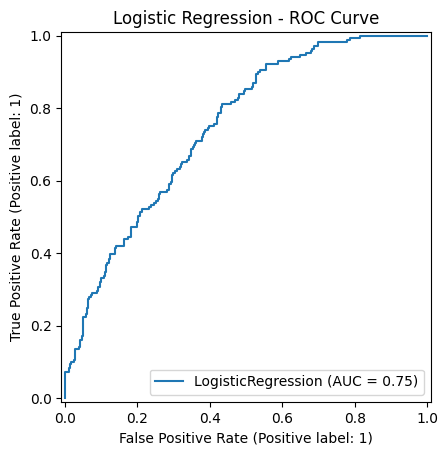

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
import matplotlib.pyplot as plt

# ----------------------------
#  Logistic Regression with L2 Regularization
# ----------------------------
log_reg = LogisticRegression(
    penalty='l2',        # can switch to 'l1' with solver='saga'
    solver='lbfgs',      # efficient for l2
    max_iter=1000,
    random_state=42
)

log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)
y_proba_lr = log_reg.predict_proba(X_test)[:, 1]

print("Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, y_proba_lr))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_lr)
ConfusionMatrixDisplay(cm).plot(cmap="Blues")
plt.title("Logistic Regression - Confusion Matrix")
plt.show()

# ROC Curve
RocCurveDisplay.from_estimator(log_reg, X_test, y_test)
plt.title("Logistic Regression - ROC Curve")
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Logistic Regression (L1) Performance:
Accuracy: 0.6711111111111111
ROC AUC: 0.7494367116595422


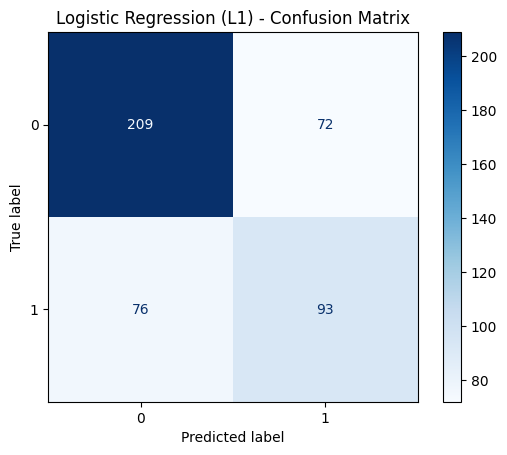

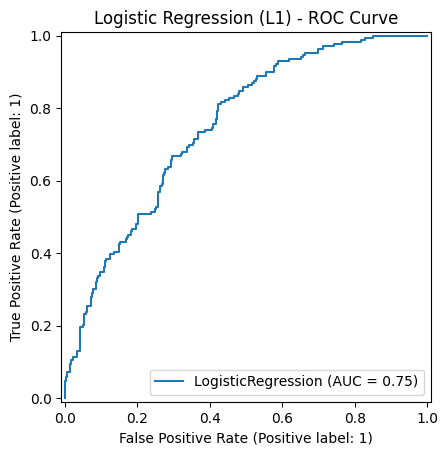

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
import matplotlib.pyplot as plt

# ----------------------------
# Logistic Regression with L1 Regularization
# ----------------------------
log_reg = LogisticRegression(
    penalty='l1',        # L1 regularization
    solver='saga',       # saga supports both l1 and l2
    max_iter=1000,
    random_state=42
)

log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)
y_proba_lr = log_reg.predict_proba(X_test)[:, 1]

print("Logistic Regression (L1) Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, y_proba_lr))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_lr)
ConfusionMatrixDisplay(cm).plot(cmap="Blues")
plt.title("Logistic Regression (L1) - Confusion Matrix")
plt.show()

# ROC Curve
RocCurveDisplay.from_estimator(log_reg, X_test, y_test)
plt.title("Logistic Regression (L1) - ROC Curve")
plt.show()


## **Model6-->KNN**


KNN Performance:
Accuracy: 0.6711111111111111
ROC AUC: 0.6972667354545263


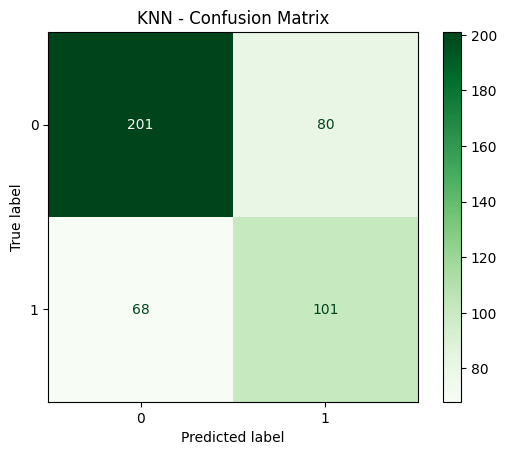

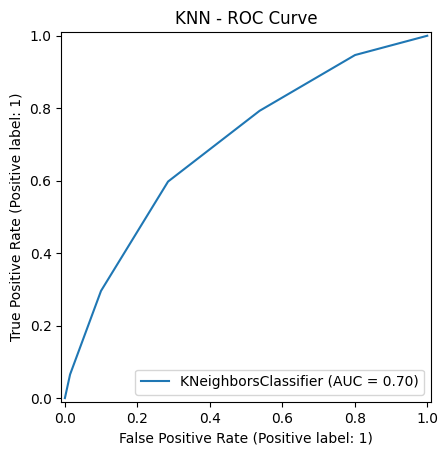

In [ ]:
# ----------------------------
# 6️⃣ K-Nearest Neighbors
# ----------------------------
knn = KNeighborsClassifier(n_neighbors=5)  # default k=5
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
y_proba_knn = knn.predict_proba(X_test)[:, 1]

print("\nKNN Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("ROC AUC:", roc_auc_score(y_test, y_proba_knn))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_knn)
ConfusionMatrixDisplay(cm).plot(cmap="Greens")
plt.title("KNN - Confusion Matrix")
plt.show()

# ROC Curve
RocCurveDisplay.from_estimator(knn, X_test, y_test)
plt.title("KNN - ROC Curve")
plt.show()

Best parameters: {'knn__metric': 'cosine', 'knn__n_neighbors': 15, 'knn__weights': 'distance'}
Best CV ROC AUC: 0.7400636038057199

KNN Final Model Performance:
Accuracy: 0.66
ROC AUC: 0.733275074227716


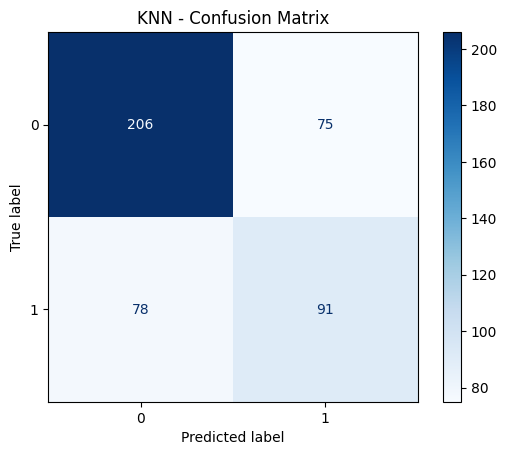

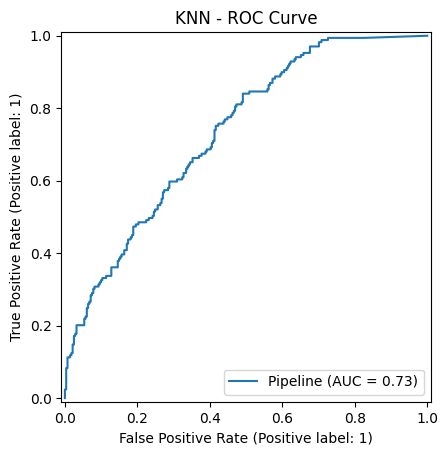

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
import matplotlib.pyplot as plt

# ----------------------------
# Pipeline: Scaling + PCA + KNN
# ----------------------------
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=50, random_state=42)),  # reduce dimensionality
    ('knn', KNeighborsClassifier())
])

# ----------------------------
# Hyperparameter Grid
# ----------------------------
param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9, 11, 15, 21],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan', 'cosine']
}

grid = GridSearchCV(pipe, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best CV ROC AUC:", grid.best_score_)

# ----------------------------
# Final Model Evaluation
# ----------------------------
best_knn = grid.best_estimator_
y_pred = best_knn.predict(X_test)
y_proba = best_knn.predict_proba(X_test)[:, 1]

print("\nKNN Final Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot(cmap="Blues")
plt.title("KNN - Confusion Matrix")
plt.show()

# ROC Curve
RocCurveDisplay.from_estimator(best_knn, X_test, y_test)
plt.title("KNN - ROC Curve")
plt.show()


# Applying a prevalence based cutoff of 20 percent

Total species before filtering: 4630
Total species after filtering: 3371
Species removed: 1259


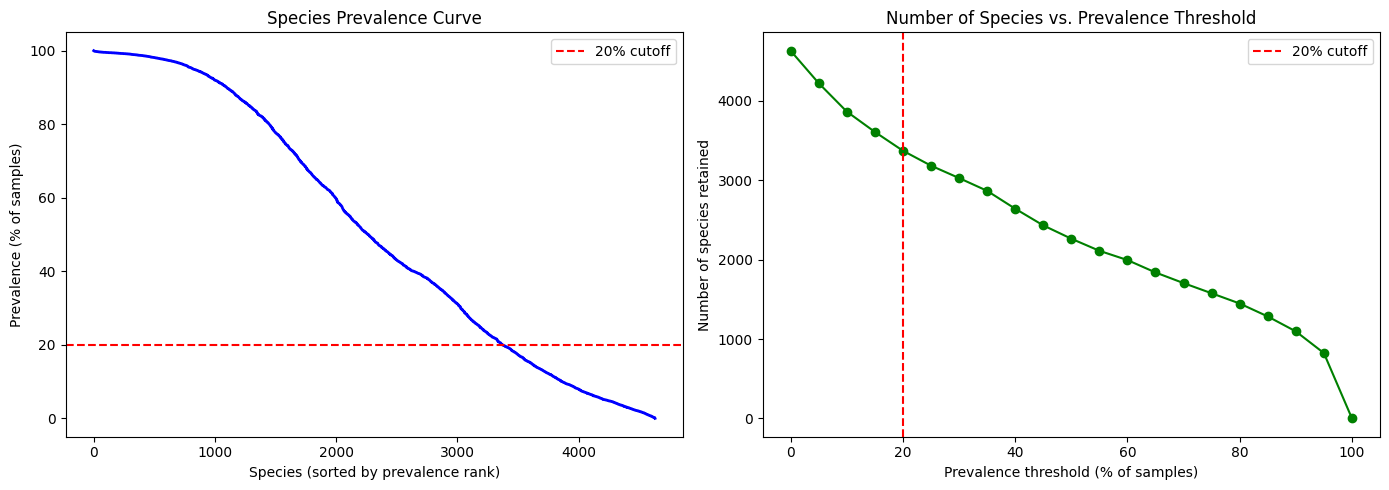

Species retained (≥ 20% prevalence): 3371
Species removed (< 20% prevalence): 1259


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ----------------------------
# 1. Calculate prevalence
# ----------------------------
species_cols = Model_Data.drop(columns=['Health_binary']).columns
n_samples = Model_Data.shape[0]

# Prevalence = fraction of samples where species is non-zero
prevalence = (Model_Data[species_cols] > 0).sum(axis=0) / n_samples * 100

# ----------------------------
# 2. Apply 20% cutoff
# ----------------------------
cutoff = 20
selected_species = prevalence[prevalence >= cutoff].index
filtered_data = Model_Data[selected_species.tolist() + ['Health_binary']]

# ----------------------------
# 3. Print data loss
# ----------------------------
print("Total species before filtering:", len(species_cols))
print("Total species after filtering:", len(selected_species))
print("Species removed:", len(species_cols) - len(selected_species))

# ----------------------------
# 4. Visualization
# ----------------------------

# --- 1. Prevalence Curve (species sorted by prevalence rank) ---
sorted_prev = prevalence.sort_values(ascending=False).reset_index(drop=True)

plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.plot(range(1, len(sorted_prev)+1), sorted_prev, color="blue", linewidth=2)
plt.axhline(cutoff, color="red", linestyle="--", label=f"{cutoff}% cutoff")
plt.xlabel("Species (sorted by prevalence rank)")
plt.ylabel("Prevalence (% of samples)")
plt.title("Species Prevalence Curve")
plt.legend()

# --- 2. Number of Species vs. Prevalence Threshold ---
thresholds = range(0, 101, 5)  # thresholds from 0% to 100% in steps of 5
species_counts = [(prevalence >= t).sum() for t in thresholds]

plt.subplot(1,2,2)
plt.plot(thresholds, species_counts, marker="o", color="green")
plt.axvline(cutoff, color="red", linestyle="--", label=f"{cutoff}% cutoff")
plt.xlabel("Prevalence threshold (% of samples)")
plt.ylabel("Number of species retained")
plt.title("Number of Species vs. Prevalence Threshold")
plt.legend()

plt.tight_layout()
plt.show()

# --- Print retained vs removed species ---
retained = (prevalence >= cutoff).sum()
removed = (prevalence < cutoff).sum()
print(f"Species retained (≥ {cutoff}% prevalence): {retained}")
print(f"Species removed (< {cutoff}% prevalence): {removed}")

In [ ]:
filtered_data

,CAG-83 sp900545495,CAG-83 sp000435555,CAG-83 sp003539495,CAG-83 sp000431575,CAG-83 sp900547745,CAG-83 sp900548615,CAG-83 sp900552475,CAG-83 sp001916855,CAG-83 sp900554275,CAG-83 sp900545585,...,MGYG000000411,Sutterella sp900545275,CAG-495 sp000436375,CAG-495 sp900540425,MGYG000000637,MGYG000001894,51-20 sp001917175,51-20 sp900762565,Lactobacillus helveticus,Health_binary
0,1.480643,1.634793,0.912659,0.852034,1.123968,2.298953,1.337542,1.170488,2.486165,1.023884,...,1.605806,-1.920555,-1.920555,-1.920555,-1.920555,-1.920555,-1.920555,-1.920555,-1.920555,0
1,1.480643,1.634793,0.912659,0.852034,1.123968,2.298953,1.337542,1.170488,2.486165,1.023884,...,1.605806,-1.920555,-1.920555,-1.920555,-1.920555,-1.920555,-1.920555,-1.920555,-1.920555,0
2,0.647084,2.151162,-1.991973,1.645613,1.721599,1.186081,-1.991973,0.572977,3.695003,1.226903,...,-1.991973,-1.991973,-1.991973,-1.991973,-1.991973,-1.991973,-1.991973,-1.991973,-1.991973,0
3,0.647084,2.151162,-1.991973,1.645613,1.721599,1.186081,-1.991973,0.572977,3.695003,1.226903,...,-1.991973,-1.991973,-1.991973,-1.991973,-1.991973,-1.991973,-1.991973,-1.991973,-1.991973,0
4,2.614087,3.118304,2.885165,2.989154,2.617076,3.021546,2.929815,2.927629,2.589843,2.561848,...,-3.197054,-3.197054,6.989957,2.677876,0.734771,1.447337,1.485077,1.093405,-0.106012,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2245,6.810131,5.598725,4.777053,4.358738,4.587124,4.635725,4.299442,4.253238,5.050633,4.657312,...,0.073272,0.766420,-2.324623,-2.324623,-2.324623,-2.324623,-2.324623,-2.324623,-2.324623,0
2246,4.407013,5.787023,8.151439,5.392388,3.777835,5.208023,3.498663,6.608783,5.267565,3.352951,...,-1.677486,-1.677486,-1.677486,-1.677486,-1.677486,-1.677486,-1.677486,-1.677486,-1.677486,0
2247,4.801511,7.983718,4.248140,4.623335,4.306062,5.452227,2.810069,4.458356,5.560833,6.374075,...,1.993689,-3.215797,-3.215797,-3.215797,-3.215797,-3.215797,-3.215797,-3.215797,-3.215797,0
2248,5.513561,6.398429,6.827150,3.891796,5.117622,6.692177,4.097739,4.785086,6.004434,5.704650,...,-0.274869,-2.759775,-2.759775,-2.759775,-2.759775,-2.759775,1.317762,-2.759775,1.903664,0


In [ ]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = filtered_data.drop(columns=['Health_binary'])
y = filtered_data['Health_binary']

# Train-test split (same as before)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Number of training samples:", len(X_train))
print("Number of test samples:", len(X_test))


Number of training samples: 1800
Number of test samples: 450


Random Forest Performance:
Accuracy: 0.72
ROC AUC: 0.791


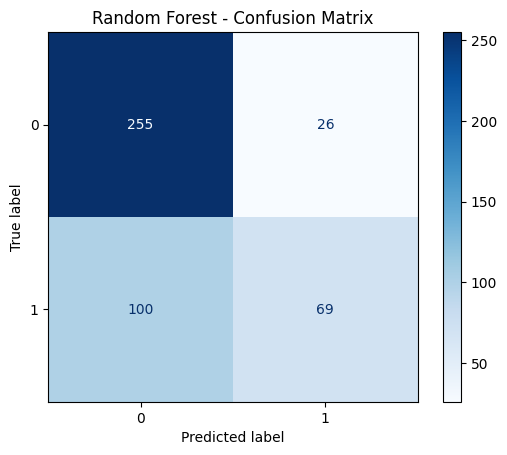

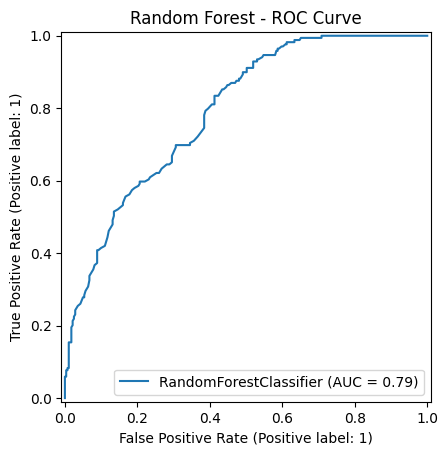

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
import matplotlib.pyplot as plt

# Initialize
rf = RandomForestClassifier(n_estimators=500, random_state=42)

# Train
rf.fit(X_train, y_train)

# Predict
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:,1]

# Metrics
print("Random Forest Performance:")
print("Accuracy:", round(accuracy_score(y_test, y_pred),3))
print("ROC AUC:", round(roc_auc_score(y_test, y_proba),3))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot(cmap="Blues")
plt.title("Random Forest - Confusion Matrix")
plt.show()

# ROC Curve
RocCurveDisplay.from_estimator(rf, X_test, y_test)
plt.title("Random Forest - ROC Curve")
plt.show()


Random Forest Performance:
Accuracy: 0.693
ROC AUC: 0.777


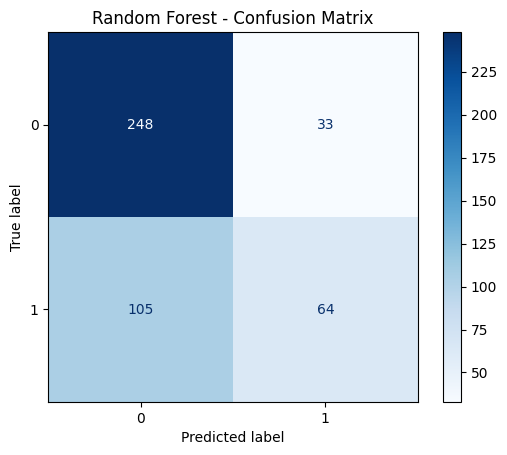

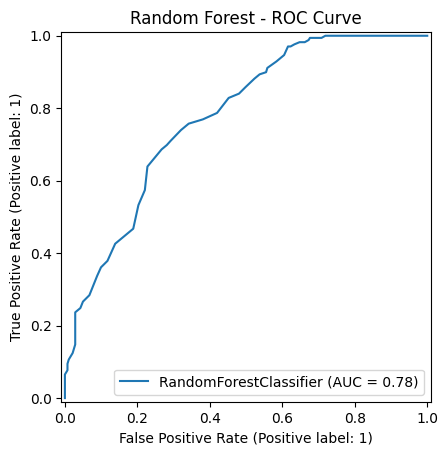

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
import matplotlib.pyplot as plt

# Initialize
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train
rf.fit(X_train, y_train)

# Predict
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:,1]

# Metrics
print("Random Forest Performance:")
print("Accuracy:", round(accuracy_score(y_test, y_pred),3))
print("ROC AUC:", round(roc_auc_score(y_test, y_proba),3))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot(cmap="Blues")
plt.title("Random Forest - Confusion Matrix")
plt.show()

# ROC Curve
RocCurveDisplay.from_estimator(rf, X_test, y_test)
plt.title("Random Forest - ROC Curve")
plt.show()


Random Forest Performance:
Accuracy: 0.702
ROC AUC: 0.79


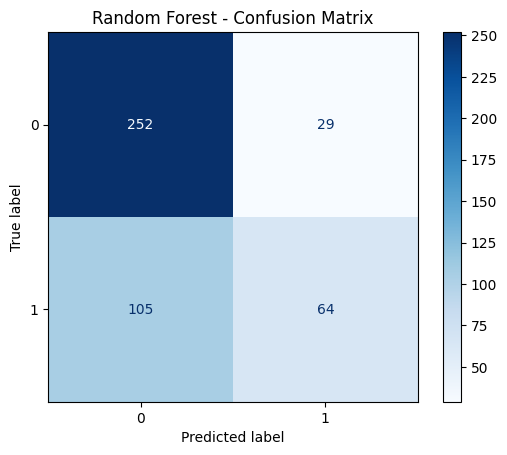

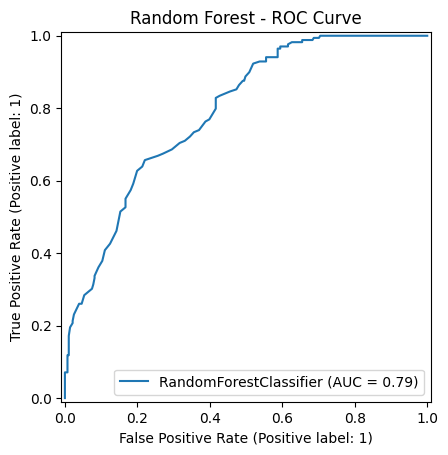

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
import matplotlib.pyplot as plt

# Initialize
rf = RandomForestClassifier(n_estimators=200, random_state=42)

# Train
rf.fit(X_train, y_train)

# Predict
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:,1]

# Metrics
print("Random Forest Performance:")
print("Accuracy:", round(accuracy_score(y_test, y_pred),3))
print("ROC AUC:", round(roc_auc_score(y_test, y_proba),3))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot(cmap="Blues")
plt.title("Random Forest - Confusion Matrix")
plt.show()

# ROC Curve
RocCurveDisplay.from_estimator(rf, X_test, y_test)
plt.title("Random Forest - ROC Curve")
plt.show()


Random Forest Performance:
Accuracy: 0.718
ROC AUC: 0.788


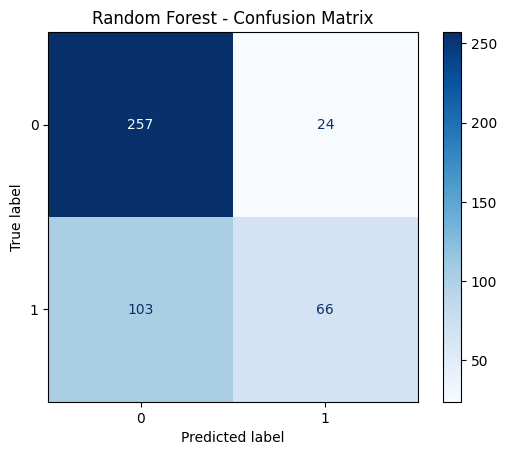

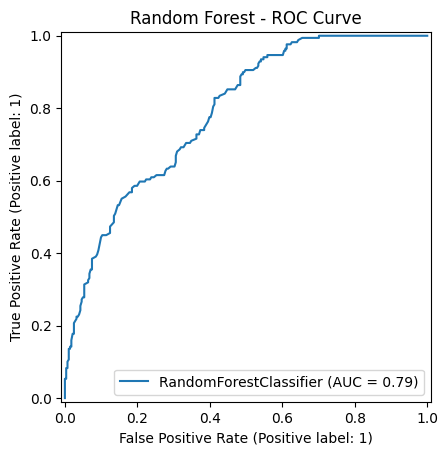

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
import matplotlib.pyplot as plt

# Initialize
rf = RandomForestClassifier(n_estimators=700, random_state=42)

# Train
rf.fit(X_train, y_train)

# Predict
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:,1]

# Metrics
print("Random Forest Performance:")
print("Accuracy:", round(accuracy_score(y_test, y_pred),3))
print("ROC AUC:", round(roc_auc_score(y_test, y_proba),3))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot(cmap="Blues")
plt.title("Random Forest - Confusion Matrix")
plt.show()

# ROC Curve
RocCurveDisplay.from_estimator(rf, X_test, y_test)
plt.title("Random Forest - ROC Curve")
plt.show()


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [10:41:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Performance:
Accuracy: 0.716
ROC AUC: 0.796


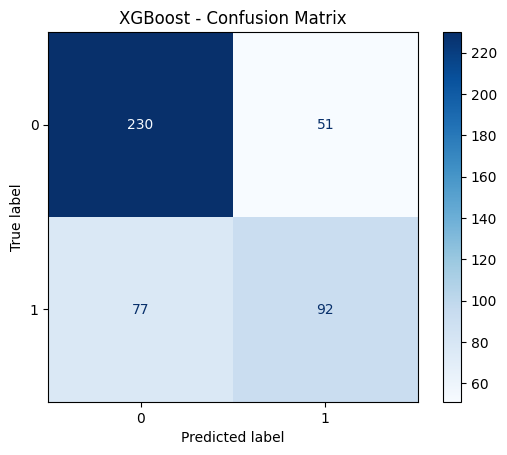

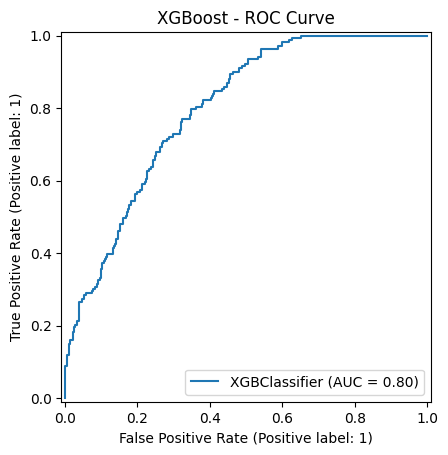

In [ ]:
# XGBoost
import xgboost as xgb

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)
y_proba = xgb_model.predict_proba(X_test)[:,1]

print("XGBoost Performance:")
print("Accuracy:", round(accuracy_score(y_test, y_pred),3))
print("ROC AUC:", round(roc_auc_score(y_test, y_proba),3))

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot(cmap="Blues")
plt.title("XGBoost - Confusion Matrix")
plt.show()

RocCurveDisplay.from_estimator(xgb_model, X_test, y_test)
plt.title("XGBoost - ROC Curve")
plt.show()


SVM Performance:
Accuracy: 0.704
ROC AUC: 0.771


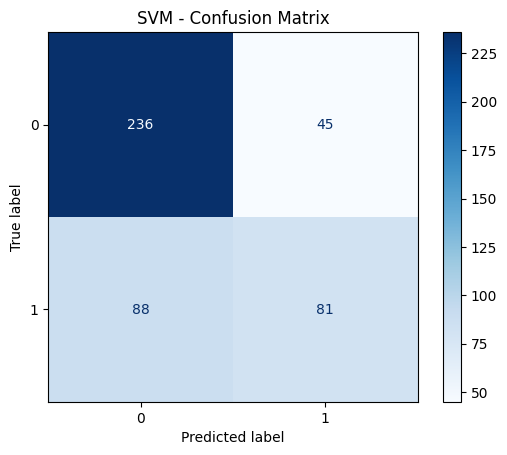

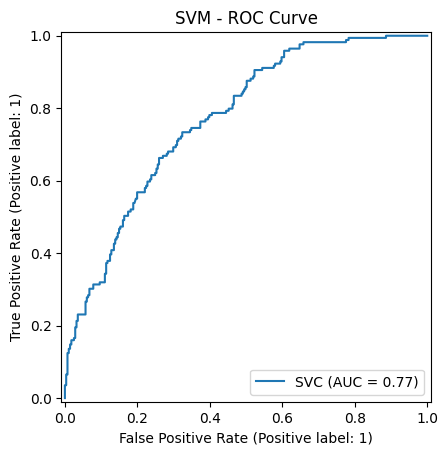

In [ ]:
# Support Vector Machine (SVM)
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)
y_proba = svm_model.predict_proba(X_test)[:,1]

print("SVM Performance:")
print("Accuracy:", round(accuracy_score(y_test, y_pred),3))
print("ROC AUC:", round(roc_auc_score(y_test, y_proba),3))

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot(cmap="Blues")
plt.title("SVM - Confusion Matrix")
plt.show()

RocCurveDisplay.from_estimator(svm_model, X_test, y_test)
plt.title("SVM - ROC Curve")
plt.show()


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 677, number of negative: 1123
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.154467 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 859605
[LightGBM] [Info] Number of data points in the train set: 1800, number of used features: 3371
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376111 -> initscore=-0.506088
[LightGBM] [Info] Start training from score -0.506088
LightGBM Performance:
Accuracy: 0.691
ROC AUC: 0.782


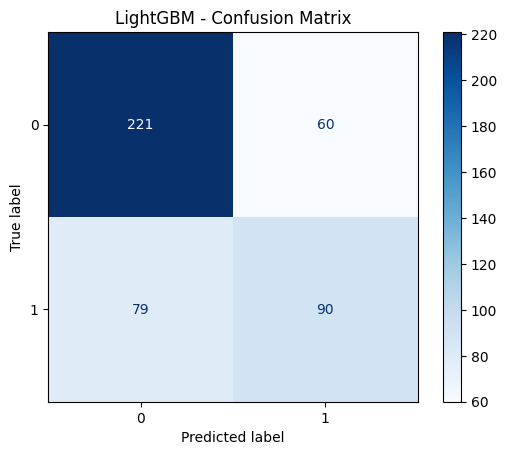

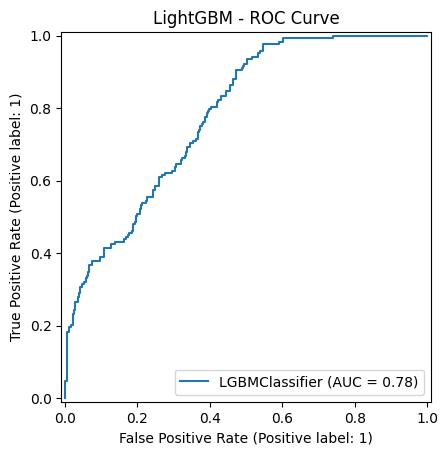

In [ ]:
# LightGBM
import lightgbm as lgb

lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)

y_pred = lgb_model.predict(X_test)
y_proba = lgb_model.predict_proba(X_test)[:,1]

print("LightGBM Performance:")
print("Accuracy:", round(accuracy_score(y_test, y_pred),3))
print("ROC AUC:", round(roc_auc_score(y_test, y_proba),3))

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot(cmap="Blues")
plt.title("LightGBM - Confusion Matrix")
plt.show()

RocCurveDisplay.from_estimator(lgb_model, X_test, y_test)
plt.title("LightGBM - ROC Curve")
plt.show()


Logistic Regression Performance:
Accuracy: 0.662
ROC AUC: 0.725


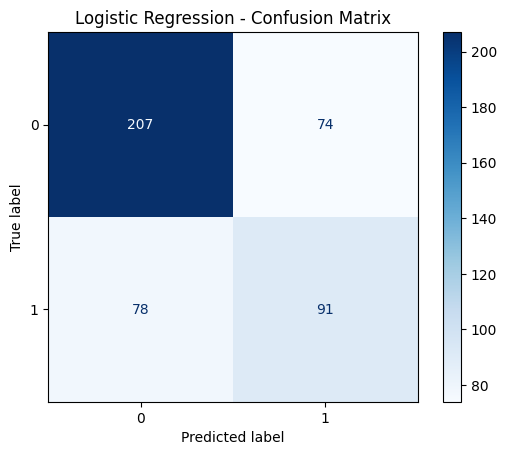

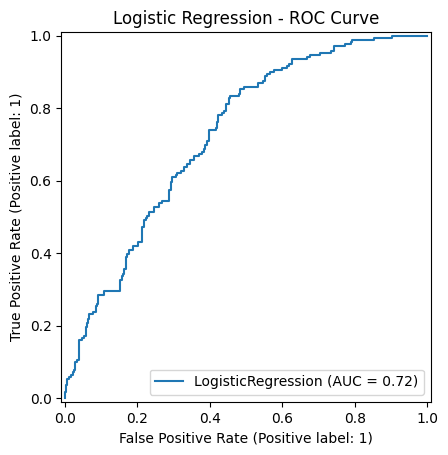

In [ ]:
# Logistic Regression (with L2 regularization)
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000, solver='lbfgs', random_state=42)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
y_proba = log_reg.predict_proba(X_test)[:,1]

print("Logistic Regression Performance:")
print("Accuracy:", round(accuracy_score(y_test, y_pred),3))
print("ROC AUC:", round(roc_auc_score(y_test, y_proba),3))

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot(cmap="Blues")
plt.title("Logistic Regression - Confusion Matrix")
plt.show()

RocCurveDisplay.from_estimator(log_reg, X_test, y_test)
plt.title("Logistic Regression - ROC Curve")
plt.show()


KNN Performance:
Accuracy: 0.627
ROC AUC: 0.689


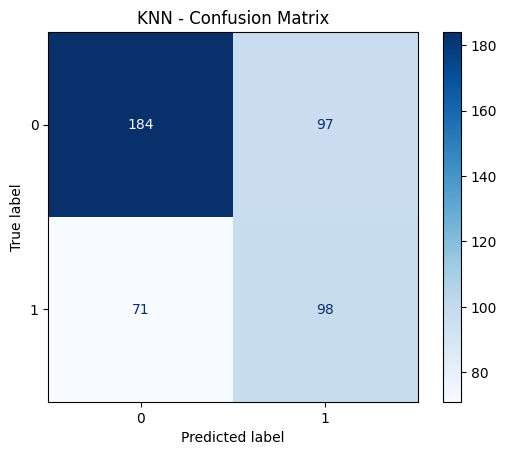

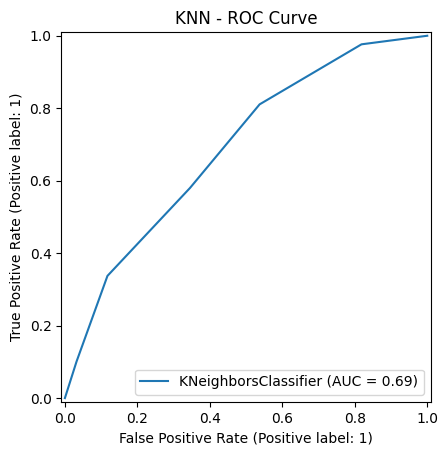

In [ ]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
y_proba = knn.predict_proba(X_test)[:,1]

print("KNN Performance:")
print("Accuracy:", round(accuracy_score(y_test, y_pred),3))
print("ROC AUC:", round(roc_auc_score(y_test, y_proba),3))

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot(cmap="Blues")
plt.title("KNN - Confusion Matrix")
plt.show()

RocCurveDisplay.from_estimator(knn, X_test, y_test)
plt.title("KNN - ROC Curve")
plt.show()
